In [6]:
import pm4py
import os
os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"


In [7]:
def import_xes(file_path):
    data = pm4py.read_xes(file_path)
    print(data.head())
    # with open(file_path, 'r') as f:
    #     data = f.read()
    #     data = BeautifulSoup(data, "xml")
    return data

data = import_xes("Hospital Billing - Event Log.xes")

parsing log, completed traces ::   0%|          | 0/100000 [00:00<?, ?it/s]

  isCancelled diagnosis            time:timestamp caseType speciality  \
0       False         A 2012-12-16 19:33:10+00:00        A          A   
1         NaN       NaN 2013-12-15 19:00:37+00:00      NaN        NaN   
2         NaN       NaN 2013-12-16 03:53:38+00:00      NaN        NaN   
3         NaN       NaN 2013-12-17 12:56:29+00:00      NaN        NaN   
4         NaN       NaN 2013-12-19 03:44:31+00:00      NaN        NaN   

  org:resource concept:name blocked isClosed flagD  ... lifecycle:transition  \
0         ResA          NEW   False     True  True  ...             complete   
1          NaN          FIN     NaN      NaN   NaN  ...             complete   
2          NaN      RELEASE     NaN      NaN   NaN  ...             complete   
3          NaN      CODE OK     NaN      NaN   NaN  ...             complete   
4         ResB       BILLED     NaN      NaN   NaN  ...             complete   

  case:concept:name closeCode actRed actOrange  flagC msgCount version  \
0     

In [8]:
process_tree = pm4py.discover_process_tree_inductive(
    data,
    activity_key='concept:name',
    case_id_key='case:concept:name',
    timestamp_key='time:timestamp'
)

In [9]:
pm4py.save_vis_process_tree(process_tree, 'process_tree.png')

''

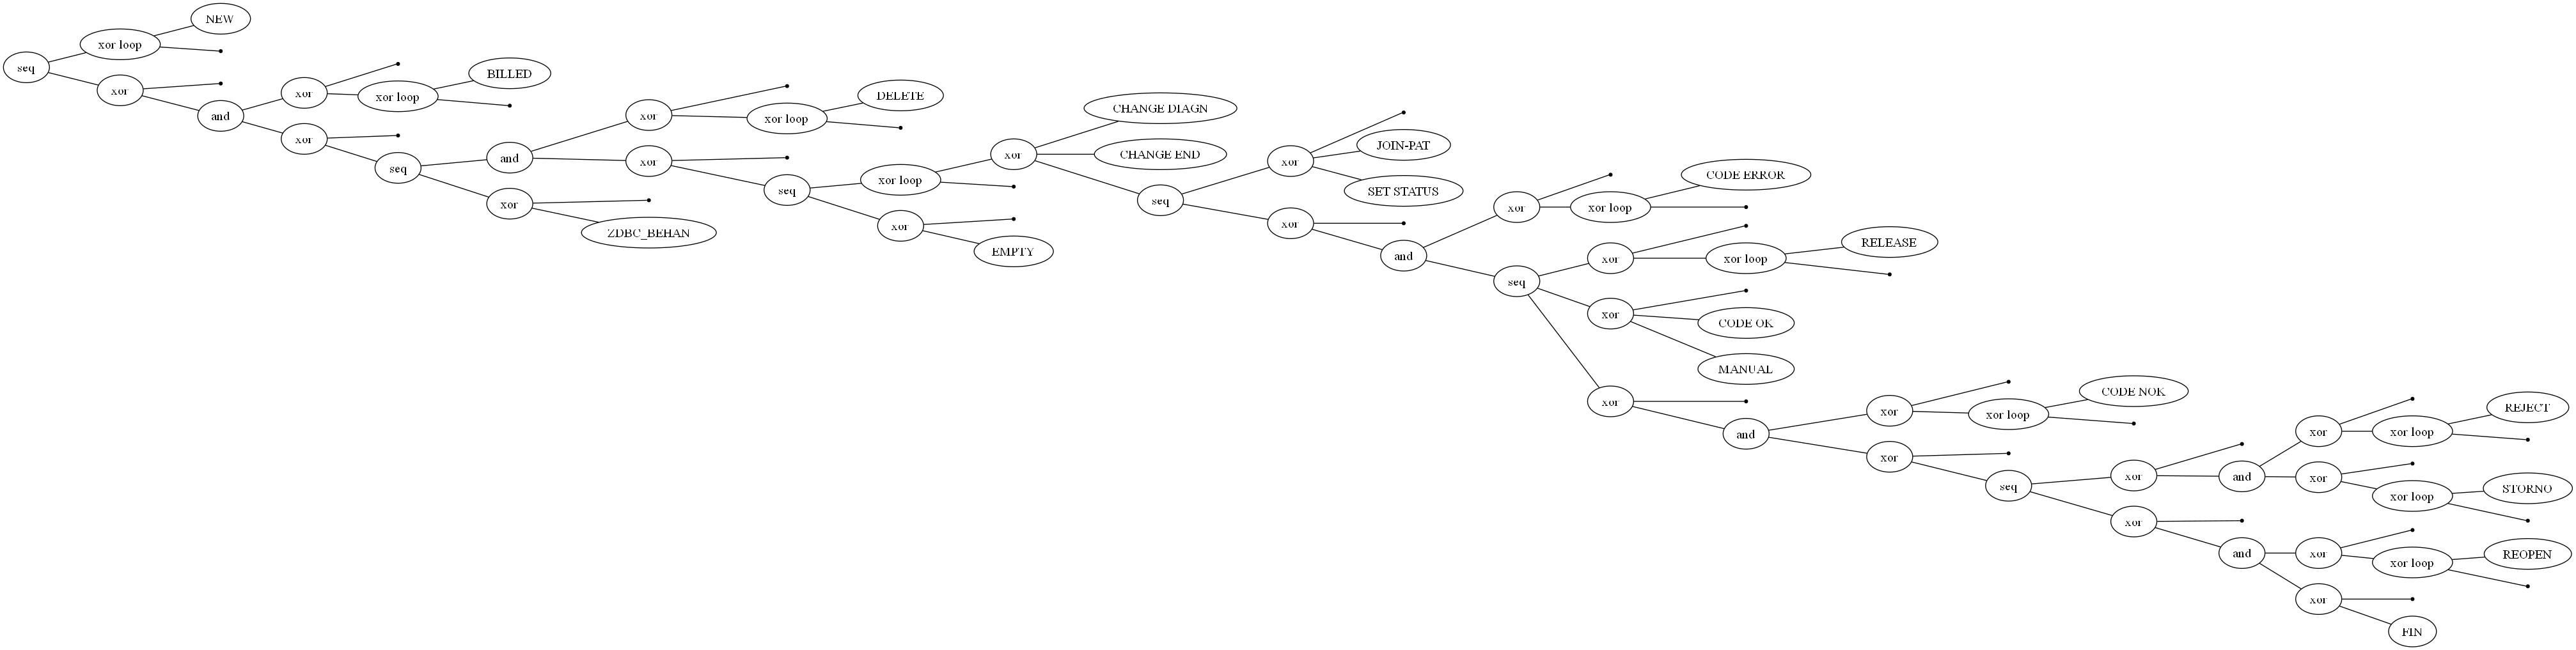

In [10]:
pm4py.view_process_tree(process_tree)

In [11]:
print(str(process_tree))

->( *( 'NEW', tau ), X( tau, +( X( tau, *( 'BILLED', tau ) ), X( tau, ->( +( X( tau, *( 'DELETE', tau ) ), X( tau, ->( *( X( 'CHANGE DIAGN', 'CHANGE END', ->( X( tau, 'JOIN-PAT', 'SET STATUS' ), X( tau, +( X( tau, *( 'CODE ERROR', tau ) ), ->( X( tau, *( 'RELEASE', tau ) ), X( tau, 'CODE OK', 'MANUAL' ), X( tau, +( X( tau, *( 'CODE NOK', tau ) ), X( tau, ->( X( tau, +( X( tau, *( 'REJECT', tau ) ), X( tau, *( 'STORNO', tau ) ) ) ), X( tau, +( X( tau, *( 'REOPEN', tau ) ), X( tau, 'FIN' ) ) ) ) ) ) ) ) ) ) ) ), tau ), X( tau, 'EMPTY' ) ) ) ), X( tau, 'ZDBC_BEHAN' ) ) ) ) ) )


In [12]:
import convert
pt = str(process_tree)
print(convert.count_nests(pt))

->(1] *(2] NEW, tau [2), X(3] tau, +(4] X(5] tau, *(6] BILLED, tau [6) [5), X(7] tau, ->(8] +(9] X(10] tau, *(11] DELETE, tau [11) [10), X(12] tau, ->(13] *(14] X(15] CHANGE DIAGN, CHANGE END, ->(16] X(17] tau, JOIN-PAT, SET STATUS [17), X(18] tau, +(19] X(20] tau, *(21] CODE ERROR, tau [21) [20), ->(22] X(23] tau, *(24] RELEASE, tau [24) [23), X(25] tau, CODE OK, MANUAL [25), X(26] tau, +(27] X(28] tau, *(29] CODE NOK, tau [29) [28), X(30] tau, ->(31] X(32] tau, +(33] X(34] tau, *(35] REJECT, tau [35) [34), X(36] tau, *(37] STORNO, tau [37) [36) [33) [32), X(38] tau, +(39] X(40] tau, *(41] REOPEN, tau [41) [40), X(42] tau, FIN [42) [39) [38) [31) [30) [27) [26) [22) [19) [18) [16) [15), tau [14), X(43] tau, EMPTY [43) [13) [12) [9), X(44] tau, ZDBC_BEHAN [44) [8) [7) [4) [3) [1)
->(1] *(2] NEW, tau [2), X(3] tau, +(4] X(5] tau, *(6] BILLED, tau [6) [5), X(7] tau, ->(8] +(9] X(10] tau, *(11] DELETE, tau [11) [10), X(12] tau, ->(13] *(14] X(15] CHANGE DIAGN, CHANGE END, ->(16] X(17] tau

In [ ]:
def calc_index(process_tree):
    print(process_tree)

In [31]:
process_tree.children[1].label